In this notebook we organize the tabular metadata, add 2 collumns of data provided by a cnn model classification training as new features, and evaluate machine learning models (such as Random Forest, AdaBoost and Decision Tree) as possible models for the final classification.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

train_df=pd.read_csv("/content/drive/MyDrive/MetaData/train.csv") #reading the data from the var
train_df

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target
0,ISIC_2637011,IP_7279968,male,45.0,head/neck,unknown,benign,0
1,ISIC_0015719,IP_3075186,female,45.0,upper extremity,unknown,benign,0
2,ISIC_0052212,IP_2842074,female,50.0,lower extremity,nevus,benign,0
3,ISIC_0068279,IP_6890425,female,45.0,head/neck,unknown,benign,0
4,ISIC_0074268,IP_8723313,female,55.0,upper extremity,unknown,benign,0
...,...,...,...,...,...,...,...,...
33121,ISIC_9999134,IP_6526534,male,50.0,torso,unknown,benign,0
33122,ISIC_9999320,IP_3650745,male,65.0,torso,unknown,benign,0
33123,ISIC_9999515,IP_2026598,male,20.0,lower extremity,unknown,benign,0
33124,ISIC_9999666,IP_7702038,male,50.0,lower extremity,unknown,benign,0


checking the values of each column:

In [ ]:
print(train_df.columns)
print(pd.unique(train_df.sex))
print(pd.unique(train_df.age_approx))
print(pd.unique(train_df.anatom_site_general_challenge))
print(pd.unique(train_df.diagnosis))
print(pd.unique(train_df.benign_malignant))
print(pd.unique(train_df.target))


Index(['image_name', 'patient_id', 'sex', 'age_approx',
       'anatom_site_general_challenge', 'diagnosis', 'benign_malignant',
       'target'],
      dtype='object')
['male' 'female' nan]
[45. 50. 55. 40. 25. 35. 30. 75. 70. 65. 60. nan 80. 20. 85. 15. 90. 10.
  0.]
['head/neck' 'upper extremity' 'lower extremity' 'torso' nan 'palms/soles'
 'oral/genital']
['unknown' 'nevus' 'melanoma' 'seborrheic keratosis' 'lentigo NOS'
 'lichenoid keratosis' 'solar lentigo' 'cafe-au-lait macule'
 'atypical melanocytic proliferation']
['benign' 'malignant']
[0 1]


if there are any missing values - dropping this data for batter model-training and results

In [ ]:
train_df.dropna()

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target
0,ISIC_2637011,IP_7279968,male,45.0,head/neck,unknown,benign,0
1,ISIC_0015719,IP_3075186,female,45.0,upper extremity,unknown,benign,0
2,ISIC_0052212,IP_2842074,female,50.0,lower extremity,nevus,benign,0
3,ISIC_0068279,IP_6890425,female,45.0,head/neck,unknown,benign,0
4,ISIC_0074268,IP_8723313,female,55.0,upper extremity,unknown,benign,0
...,...,...,...,...,...,...,...,...
33121,ISIC_9999134,IP_6526534,male,50.0,torso,unknown,benign,0
33122,ISIC_9999320,IP_3650745,male,65.0,torso,unknown,benign,0
33123,ISIC_9999515,IP_2026598,male,20.0,lower extremity,unknown,benign,0
33124,ISIC_9999666,IP_7702038,male,50.0,lower extremity,unknown,benign,0


In [ ]:
#train_df = train_df.set_index('image_name')

# Remove patient_id column and save in a new DataFrame
df_for_prediction = train_df.drop('patient_id', axis=1)

# Perform one-hot encoding
one_hot_encoded = pd.get_dummies(df_for_prediction[['sex', 'anatom_site_general_challenge']])

df_for_prediction = pd.concat([one_hot_encoded, df_for_prediction[['age_approx', 'target']]], axis=1)

In [ ]:
df_for_prediction = df_for_prediction[~df_for_prediction.astype(str).eq('nan').any(axis=1)]
df_for_prediction

,sex_female,sex_male,anatom_site_general_challenge_head/neck,anatom_site_general_challenge_lower extremity,anatom_site_general_challenge_oral/genital,anatom_site_general_challenge_palms/soles,anatom_site_general_challenge_torso,anatom_site_general_challenge_upper extremity,age_approx,target
0,0,1,1,0,0,0,0,0,45.0,0
1,1,0,0,0,0,0,0,1,45.0,0
2,1,0,0,1,0,0,0,0,50.0,0
3,1,0,1,0,0,0,0,0,45.0,0
4,1,0,0,0,0,0,0,1,55.0,0
...,...,...,...,...,...,...,...,...,...,...
33121,0,1,0,0,0,0,1,0,50.0,0
33122,0,1,0,0,0,0,1,0,65.0,0
33123,0,1,0,1,0,0,0,0,20.0,0
33124,0,1,0,1,0,0,0,0,50.0,0


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
import seaborn as sns
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
X = df_for_prediction.iloc[:,0:-1]
Y = df_for_prediction['target']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=0, stratify=Y)

Accuracy D.T.: 0.9824561403508771
AUC: 0.5


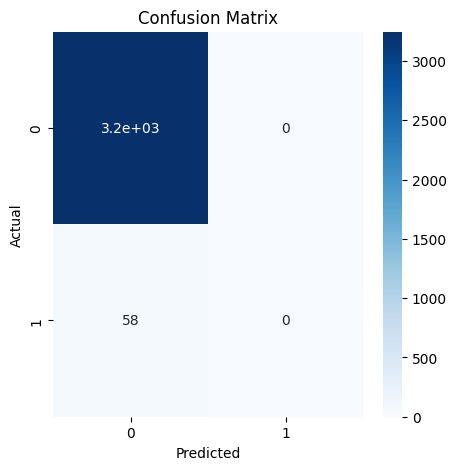

Accuracy D.T.: 0.9824561403508771
AUC: 0.5


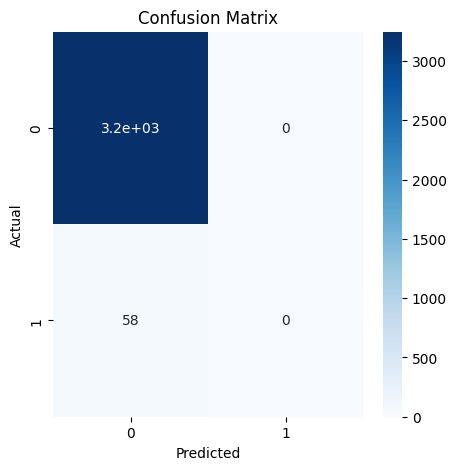

In [ ]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have X_train, Y_train, X_test, Y_test defined

classifiers = [
    RandomForestClassifier(n_estimators=50, random_state=0),
    AdaBoostClassifier(n_estimators=50, random_state=0)
]

for clf in classifiers:
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)

    accuracy = accuracy_score(Y_test, Y_pred)
    auc_score = roc_auc_score(Y_test, Y_pred)
    cm = confusion_matrix(Y_test, Y_pred)

    print("Accuracy D.T.:", accuracy)
    print("AUC:", auc_score)

    labels = ['0', '1']
    plt.figure(figsize=(5, 5))
    sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()


In [ ]:
# clf_DT = DecisionTreeClassifier(max_depth=4)
# clf_DT.fit(X_train, Y_train)

# predictions = clf_DT.predict(X_test)
# predictions

# accuracy = accuracy_score(Y_test, predictions)
# print("Accuracy D.T.:", accuracy)
# auc_score = roc_auc_score(Y_test, predictions)
# print("AUC:", auc_score)

# cm = confusion_matrix(Y_test, predictions)
# labels = ['0', '1']
# plt.figure(figsize=(5, 5))
# sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=labels, yticklabels=labels)
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.title('Confusion Matrix')
# plt.show()

# plt.figure(figsize=(20, 5))
# plot_tree(clf_DT, feature_names=X.columns, class_names=clf_DT.classes_.astype(str), filled=True , fontsize=7)
# plt.show()

In [ ]:
selected_df = df_for_prediction[df_for_prediction['target'] == 1].copy()
sampled_data = df_for_prediction[df_for_prediction['target'] == 0].sample(n=2000, random_state=42)
new_df = pd.concat([selected_df, sampled_data], ignore_index=True)

X = new_df.iloc[:,0:-1]
Y = new_df['target']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=0, stratify=Y)

Accuracy D.T.: 0.7644787644787645
AUC: 0.5427966101694914


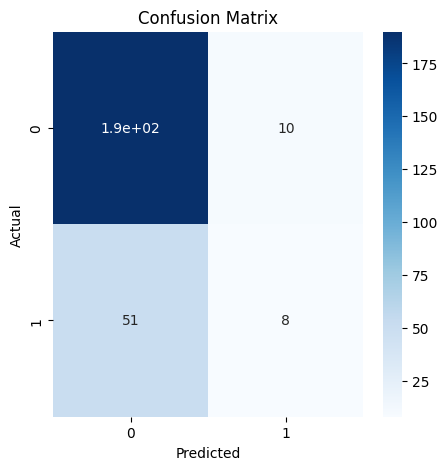

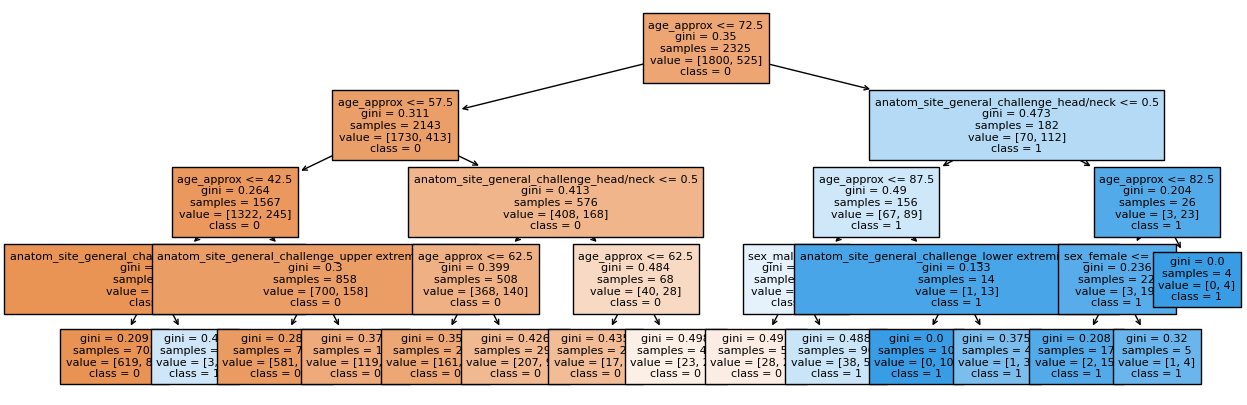

In [ ]:
clf = DecisionTreeClassifier(max_depth=4)
clf.fit(X_train, Y_train)

predictions = clf.predict(X_test)
predictions

accuracy = accuracy_score(Y_test, predictions)
print("Accuracy D.T.:", accuracy)
auc_score = roc_auc_score(Y_test, predictions)
print("AUC:", auc_score)

cm = confusion_matrix(Y_test, predictions)
labels = ['0', '1']
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

plt.figure(figsize=(15, 5))
plot_tree(clf, feature_names=X.columns, class_names=clf.classes_.astype(str), filled=True , fontsize=8)
plt.show()

*seccond try*

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

trainDf=pd.read_csv("/content/drive/MyDrive/MetaData/train.csv") #reading the data from the var


In [ ]:
trainDf.head() #לראות איך הדטא מתקבל

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target
0,ISIC_2637011,IP_7279968,male,45.0,head/neck,unknown,benign,0
1,ISIC_0015719,IP_3075186,female,45.0,upper extremity,unknown,benign,0
2,ISIC_0052212,IP_2842074,female,50.0,lower extremity,nevus,benign,0
3,ISIC_0068279,IP_6890425,female,45.0,head/neck,unknown,benign,0
4,ISIC_0074268,IP_8723313,female,55.0,upper extremity,unknown,benign,0


In [ ]:
trainDf["image_name"] = trainDf["image_name"].str.replace("ISIC_", "")
trainDf.head() #לראות איך הדטא מתקבל

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target
0,2637011,IP_7279968,male,45.0,head/neck,unknown,benign,0
1,0015719,IP_3075186,female,45.0,upper extremity,unknown,benign,0
2,0052212,IP_2842074,female,50.0,lower extremity,nevus,benign,0
3,0068279,IP_6890425,female,45.0,head/neck,unknown,benign,0
4,0074268,IP_8723313,female,55.0,upper extremity,unknown,benign,0


In [ ]:
trainDf.info() #מה מציגה כל עמודה ואם יש ערכים חסרים

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33126 entries, 0 to 33125
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   image_name                     33126 non-null  object 
 1   patient_id                     33126 non-null  object 
 2   sex                            33061 non-null  object 
 3   age_approx                     33058 non-null  float64
 4   anatom_site_general_challenge  32599 non-null  object 
 5   diagnosis                      33126 non-null  object 
 6   benign_malignant               33126 non-null  object 
 7   target                         33126 non-null  int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 2.0+ MB


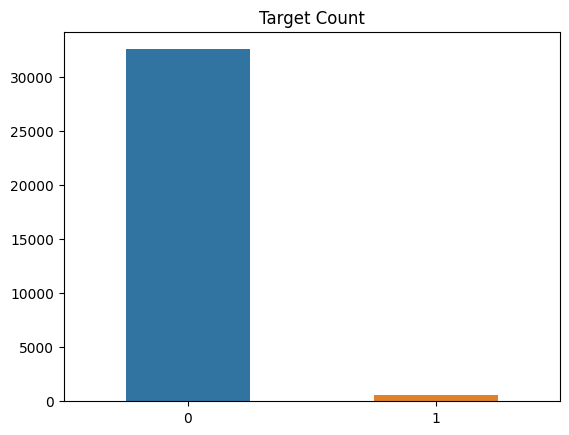

['benign', 'malignant']
[32542   584]


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

x = trainDf['target'].value_counts().values
sns.barplot(x = [0, 1], y = x, width = 0.5)
plt.title('Target Count')
plt.show() #מראה את יחס הטרגטים זה לזה

print(["benign","malignant"])
print(x)

the targets are imbalanced.

we dont want the classifier to always predict the larger class in order to have a high accuracy rate, and have false-negative prediction. so we need to change the performance metric.

In [ ]:
#train_df = train_df.set_index('image_name')

# Remove patient_id column and save in a new DataFrame
df_for_predict = trainDf.drop('patient_id', axis=1)

# Perform one-hot encoding
one_hot_encoded = pd.get_dummies(df_for_predict[['sex', 'anatom_site_general_challenge']])

df_for_predict = pd.concat([one_hot_encoded, df_for_predict[['age_approx', 'target']]], axis=1)

In [ ]:
df_for_predict = df_for_predict[~df_for_predict.astype(str).eq('nan').any(axis=1)]
df_for_predict

,sex_female,sex_male,anatom_site_general_challenge_head/neck,anatom_site_general_challenge_lower extremity,anatom_site_general_challenge_oral/genital,anatom_site_general_challenge_palms/soles,anatom_site_general_challenge_torso,anatom_site_general_challenge_upper extremity,age_approx,target
0,0,1,1,0,0,0,0,0,45.0,0
1,1,0,0,0,0,0,0,1,45.0,0
2,1,0,0,1,0,0,0,0,50.0,0
3,1,0,1,0,0,0,0,0,45.0,0
4,1,0,0,0,0,0,0,1,55.0,0
...,...,...,...,...,...,...,...,...,...,...
33121,0,1,0,0,0,0,1,0,50.0,0
33122,0,1,0,0,0,0,1,0,65.0,0
33123,0,1,0,1,0,0,0,0,20.0,0
33124,0,1,0,1,0,0,0,0,50.0,0


In [ ]:
from sklearn.model_selection import train_test_split

#חלוקה לאימון וולידציה 80-20
X_train, X_test, y_train, y_test = train_test_split(df_for_predict.drop('target', axis=1), df_for_predict['target'], test_size=0.2, random_state=1)


now we will try resampling by removing samples from the majority class, and adding more examples from the minority class.

we use the resampling module from Scikit-Learn to randomly replicate samples from the smaller class.

drawback is removing information that may be valuable. this could lead to underfitting and poor generalization to the test set.

In [ ]:
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score,precision_recall_curve,roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

import time
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
import seaborn as sns
from sklearn.ensemble import AdaBoostClassifier

In [ ]:


X = df_for_prediction.iloc[:,0:-1]
Y = df_for_prediction['target']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=0, stratify=Y)

In [ ]:
print(X.shape)
print(Y.shape)

if X.shape[0] != Y.shape[0]:
  print("X and Y rows are mismatched, check dataset again")

(33058, 9)
(33058,)


Accuracy: 0.9824561403508771
AUC: 0.5


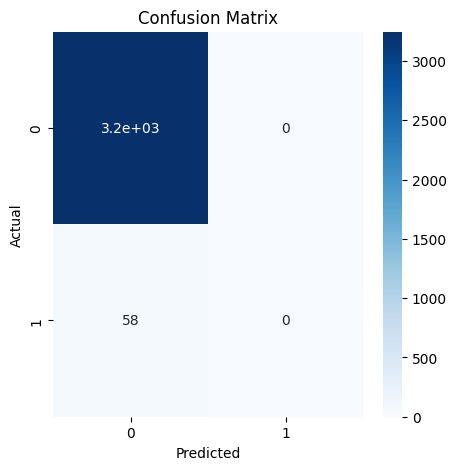

Accuracy: 0.9824561403508771
AUC: 0.5


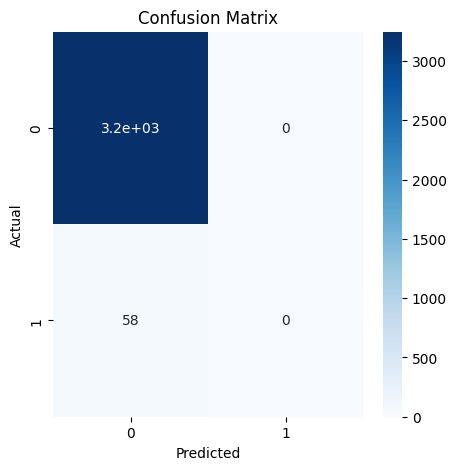

In [ ]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have X_train, Y_train, X_test, Y_test defined

# Define class weights
class_weights = dict(zip([0, 1], [(len(Y_train) / (2 * np.bincount(Y_train)))[0],
                                 (len(Y_train) / (2 * np.bincount(Y_train)))[1]]))

classifiers = [
    RandomForestClassifier(n_estimators=50, random_state=0, class_weight=class_weights),
    AdaBoostClassifier(n_estimators=50, random_state=0)
]

for clf in classifiers:
    clf.fit(X_train, Y_train)
    y_pred = clf.predict(X_test)

    accuracy = accuracy_score(Y_test, Y_pred)
    auc_score = roc_auc_score(Y_test, Y_pred)
    cm = confusion_matrix(Y_test, Y_pred)

    print("Accuracy:", accuracy)
    print("AUC:", auc_score)

    labels = ['0', '1']
    plt.figure(figsize=(5, 5))
    sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel
import pandas as pd

# Assuming you have X_train_resampled, y_train_resampled, X_test, y_test defined

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# Initialize the classifier
clf = RandomForestClassifier(random_state=0, class_weight='balanced')

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(clf, param_grid, cv=5)
grid_search.fit(X_train, Y_train)

# Get the best classifier with tuned hyperparameters
clf_best = grid_search.best_estimator_

# Feature selection using SelectFromModel
sfm = SelectFromModel(clf_best, threshold='median')
X_train_selected = sfm.fit_transform(X_train, Y_train)
X_test_selected = sfm.transform(X_test)

# Fit the classifier on the selected features
clf_best.fit(X_train_selected, Y_train)

# Make predictions
y_pred = clf_best.predict(X_test_selected)
y_pred_prob = clf_best.predict_proba(X_test_selected)

# Adjust the threshold for classification
threshold = 0.7  # Adjust the threshold as desired
y_pred_adjusted = (y_pred_prob[:, 1] > threshold).astype(int)

accuracy = accuracy_score(Y_test, y_pred_adjusted)
auc_score = roc_auc_score(Y_test, y_pred_adjusted)
cm = confusion_matrix(Y_test, y_pred_adjusted)

print("Accuracy:", accuracy)
print("AUC:", auc_score)

labels = ['0', '1']
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Compute confusion matrix
cm = confusion_matrix(Y_test, y_pred_adjusted)

# Create a DataFrame from the confusion matrix
cm_df = pd.DataFrame(cm, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])

# Print the confusion matrix as a table
print(cm_df)


KeyboardInterrupt: ignored

Accuracy: 0.14640048396854205
AUC: 0.489378078817734


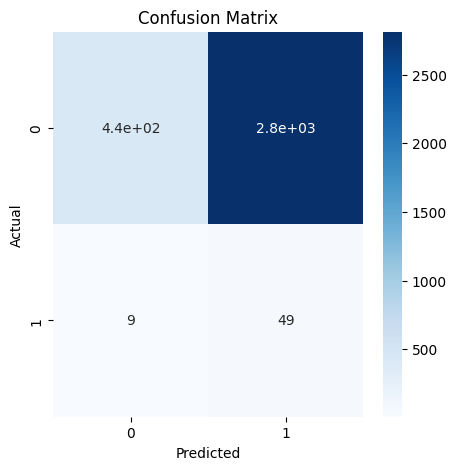

          Predicted 0  Predicted 1
Actual 0          435         2813
Actual 1            9           49


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel
import pandas as pd

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# Initialize the classifier
clf = RandomForestClassifier(random_state=0, class_weight='balanced')

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(clf, param_grid, cv=5)
grid_search.fit(X_train, Y_train)

# Get the best classifier with tuned hyperparameters
clf_best = grid_search.best_estimator_

# Feature selection using SelectFromModel
sfm = SelectFromModel(clf_best, threshold='median')
X_train_selected = sfm.fit_transform(X_train, Y_train)
X_test_selected = sfm.transform(X_test)

# Fit the classifier on the selected features
clf_best.fit(X_train_selected, Y_train)

# Make predictions
y_pred = clf_best.predict(X_test_selected)
y_pred_prob = clf_best.predict_proba(X_test_selected)

# Adjust the threshold for classification
threshold = 0.2  # Decreasing the threshold
y_pred_adjusted = (y_pred_prob[:, 1] > threshold).astype(int)

accuracy = accuracy_score(Y_test, y_pred_adjusted)
auc_score = roc_auc_score(Y_test, y_pred_adjusted)
cm = confusion_matrix(Y_test, y_pred_adjusted)

print("Accuracy:", accuracy)
print("AUC:", auc_score)

labels = ['0', '1']
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Compute confusion matrix
cm = confusion_matrix(Y_test, y_pred_adjusted)

# Create a DataFrame from the confusion matrix
cm_df = pd.DataFrame(cm, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])

# Print the confusion matrix as a table
print(cm_df)


In [ ]:
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures

# Assuming you have df_for_predict dataframe

# Feature engineering - Polynomial features
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Get polynomial feature names
feature_names = X_train.columns
poly_feature_names = poly.get_feature_names_out(feature_names)

# Create dataframes for the polynomial features
X_train_poly_df = pd.DataFrame(X_train_poly, columns=poly_feature_names)
X_test_poly_df = pd.DataFrame(X_test_poly, columns=poly_feature_names)

# Concatenate the polynomial features with the original features
X_train_features = pd.concat([X_train, X_train_poly_df], axis=1)


In [ ]:
import seaborn as sns

cm = sns.light_palette("green", as_cmap=True)
(df_for_predict.corr()).style.background_gradient(cmap=cm)

,sex_female,sex_male,anatom_site_general_challenge_head/neck,anatom_site_general_challenge_lower extremity,anatom_site_general_challenge_oral/genital,anatom_site_general_challenge_palms/soles,anatom_site_general_challenge_torso,anatom_site_general_challenge_upper extremity,age_approx,target
sex_female,1.000000,-1.000000,-0.015755,0.054159,-0.014787,-0.017291,-0.066969,0.048844,-0.109827,-0.028612
sex_male,-1.000000,1.000000,0.015755,-0.054159,0.014787,0.017291,0.066969,-0.048844,0.109827,0.028612
anatom_site_general_challenge_head/neck,-0.015755,0.015755,1.000000,-0.141892,-0.014918,-0.026043,-0.247519,-0.102185,0.057913,0.041419
anatom_site_general_challenge_lower extremity,0.054159,-0.054159,-0.141892,1.000000,-0.035811,-0.062514,-0.594161,-0.245292,0.008315,-0.012858
anatom_site_general_challenge_oral/genital,-0.014787,0.014787,-0.014918,-0.035811,1.000000,-0.006573,-0.062469,-0.025790,-0.019266,0.006797
anatom_site_general_challenge_palms/soles,-0.017291,0.017291,-0.026043,-0.062514,-0.006573,1.000000,-0.109052,-0.045021,-0.033694,-0.003523
anatom_site_general_challenge_torso,-0.066969,0.066969,-0.247519,-0.594161,-0.062469,-0.109052,1.000000,-0.427894,-0.010406,-0.018478
anatom_site_general_challenge_upper extremity,0.048844,-0.048844,-0.102185,-0.245292,-0.025790,-0.045021,-0.427894,1.000000,-0.010347,0.014994
age_approx,-0.109827,0.109827,0.057913,0.008315,-0.019266,-0.033694,-0.010406,-0.010347,1.000000,0.086388
target,-0.028612,0.028612,0.041419,-0.012858,0.006797,-0.003523,-0.018478,0.014994,0.086388,1.000000


Adding the predictions from the cnn as a feature

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/predictions.csv")

# column to list using Series.tolist()
# prediction to list
pred_list = df["target"].tolist()

# adding list as a column
df_for_prediction['predict'] = pred_list

df_for_prediction.head()

ValueError: ignored

In [ ]:
X = df_for_prediction.iloc[:,0:-1]
Y = df_for_prediction['target']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=0, stratify=Y)

Accuracy D.T.: 0.9824561403508771
AUC: 0.5


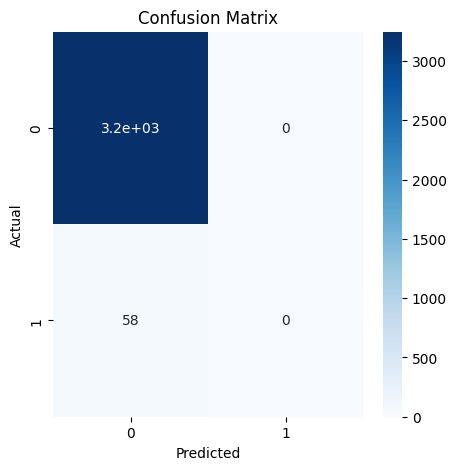

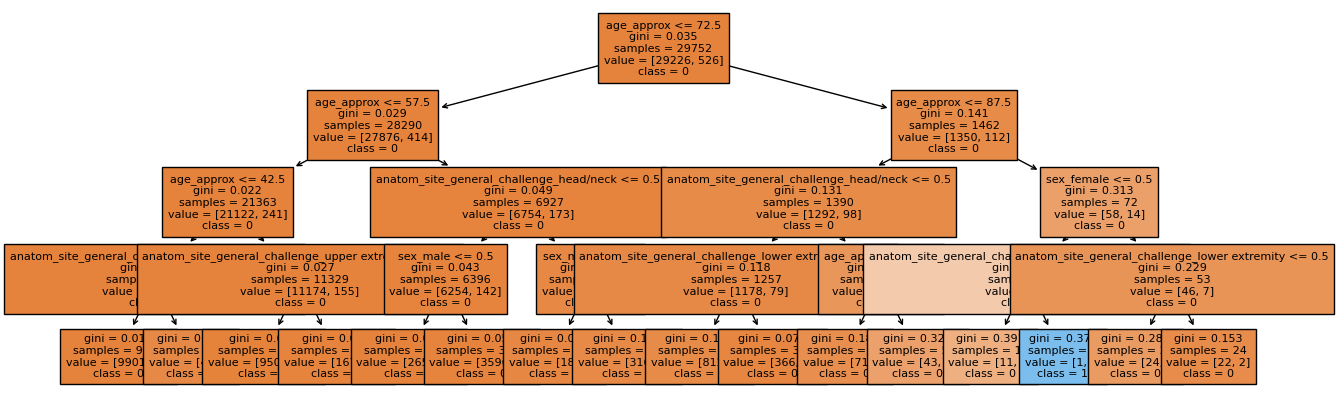

In [ ]:
clf = DecisionTreeClassifier(max_depth=4)
clf.fit(X_train, Y_train)

predictions = clf.predict(X_test)
predictions

accuracy = accuracy_score(Y_test, predictions)
print("Accuracy D.T.:", accuracy)
auc_score = roc_auc_score(Y_test, predictions)
print("AUC:", auc_score)

cm = confusion_matrix(Y_test, predictions)
labels = ['0', '1']
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

plt.figure(figsize=(15, 5))
plot_tree(clf, feature_names=X.columns, class_names=clf.classes_.astype(str), filled=True , fontsize=8)
plt.show()